#### Loading the Reuters dataset

In [1]:
from keras.datasets import reuters

Using TensorFlow backend.


In [2]:
import numpy as np

np_load_old = np.load
np.load = lambda *a,**k: np_load_old(*a, allow_pickle=True, **k)

(train_data, train_labels), (test_data,  test_labels) = reuters.load_data(num_words=10000)

np.load = np_load_old

In [3]:
len(train_data)

8982

In [4]:
len(test_data)

2246

In [5]:
train_data[10]

[1,
 245,
 273,
 207,
 156,
 53,
 74,
 160,
 26,
 14,
 46,
 296,
 26,
 39,
 74,
 2979,
 3554,
 14,
 46,
 4689,
 4329,
 86,
 61,
 3499,
 4795,
 14,
 61,
 451,
 4329,
 17,
 12]

#### Decoding newswires back to text

In [6]:
word_index = reuters.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
decoded_newswire = ''.join([reverse_word_index.get(i - 3, '?') for i in train_data[0]])

In [7]:
train_labels[10]

3

#### Encoding the data

In [8]:
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [9]:
def to_one_hot(labels, dimension=46):
    results = np.zeros((len(labels), dimension))
    for i, label in enumerate(labels):
        results[i, label] = 1.
    return results

one_hot_train_labels = to_one_hot(train_labels)
one_hot_test_labels = to_one_hot(test_labels)

In [10]:
from keras.utils.np_utils import to_categorical

one_hot_train_labels = to_categorical(train_labels)
one_hot_test_labels = to_categorical(test_labels)

#### Model definition

In [11]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

W0924 10:26:42.222643 4574713280 deprecation_wrapper.py:119] From /anaconda3/envs/keras-tensorflow/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0924 10:26:42.257857 4574713280 deprecation_wrapper.py:119] From /anaconda3/envs/keras-tensorflow/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0924 10:26:42.259749 4574713280 deprecation_wrapper.py:119] From /anaconda3/envs/keras-tensorflow/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.



#### Compiling the model

In [12]:
model.compile(optimizer='rmsprop',
             loss='categorical_crossentropy',
             metrics=['accuracy'])

W0924 10:26:42.325391 4574713280 deprecation_wrapper.py:119] From /anaconda3/envs/keras-tensorflow/lib/python3.6/site-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0924 10:26:42.354923 4574713280 deprecation_wrapper.py:119] From /anaconda3/envs/keras-tensorflow/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:3295: The name tf.log is deprecated. Please use tf.math.log instead.



#### Setting aside a validation set

In [13]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]

y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

#### Training the model

In [14]:
history = model.fit(partial_x_train,
                   partial_y_train,
                   epochs=20,
                   batch_size=512,
                   validation_data=(x_val, y_val))

W0924 10:26:42.492345 4574713280 deprecation.py:323] From /anaconda3/envs/keras-tensorflow/lib/python3.6/site-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
W0924 10:26:42.573455 4574713280 deprecation_wrapper.py:119] From /anaconda3/envs/keras-tensorflow/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:986: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.



Train on 7982 samples, validate on 1000 samples
Epoch 1/20
7982/7982 [==============================] - 2s 310us/step - loss: 2.5322 - acc: 0.4955 - val_loss: 1.7208 - val_acc: 0.6120
Epoch 2/20
7982/7982 [==============================] - 1s 139us/step - loss: 1.4452 - acc: 0.6879 - val_loss: 1.3455 - val_acc: 0.7060
Epoch 3/20
7982/7982 [==============================] - 1s 114us/step - loss: 1.0951 - acc: 0.7652 - val_loss: 1.1711 - val_acc: 0.7420
Epoch 4/20
7982/7982 [==============================] - 1s 100us/step - loss: 0.8695 - acc: 0.8161 - val_loss: 1.0798 - val_acc: 0.7590
Epoch 5/20
7982/7982 [==============================] - 1s 120us/step - loss: 0.7030 - acc: 0.8480 - val_loss: 0.9844 - val_acc: 0.7830
Epoch 6/20
7982/7982 [==============================] - 1s 128us/step - loss: 0.5662 - acc: 0.8801 - val_loss: 0.9405 - val_acc: 0.8030
Epoch 7/20
7982/7982 [==============================] - 1s 166us/step - loss: 0.4577 - acc: 0.9048 - val_loss: 0.9074 - val_acc: 0.8020


#### Plotting the training and validation loss

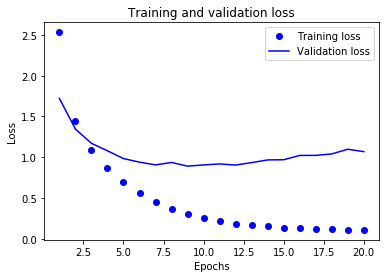

In [15]:
%matplotlib inline
import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

#### Plotting the training and validation accuracy

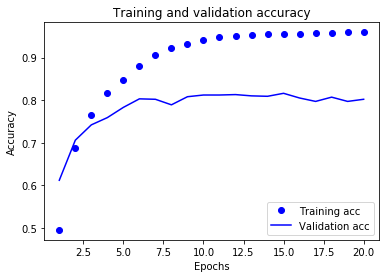

In [17]:
plt.clf()

acc = history.history['acc']
val_acc = history.history['val_acc']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()